In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
import joblib as jl
from joblib import dump,load
import warnings
warnings.filterwarnings("ignore")

## Problem Statement
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Our task is to make a model that can consider the data provided and predict the Average Price.

In [2]:
# Loading DataSet
df= pd.read_csv(r'C:\Users\hp\Dropbox\PC\Desktop\Evaluation Projects\Week 1\Avocado\avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Data Description
Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

## EDA( Preprocessing)

In [3]:
# Let's check data shape
df.shape

(18249, 14)

In [4]:
# checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
# as we can see there are 18249 row's and data dosen't have any null values,but lets confirm it.
df.isnull().sum()


Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
# It's confirm that there is no null values 
# let's check the stats of our data
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
# as we can notice column with name('Unnamed: 0 ') is of no use,so we should drop it
df.drop(columns=['Unnamed: 0'] , axis=1, inplace=True )


In [8]:
#Checking unique elements

for i in df.columns:
    print(i ,':', len(df[i].unique()))

Date : 169
AveragePrice : 259
Total Volume : 18237
4046 : 17702
4225 : 18103
4770 : 12071
Total Bags : 18097
Small Bags : 17321
Large Bags : 15082
XLarge Bags : 5588
type : 2
year : 4
region : 54


In [9]:
df.value_counts(['type'])

type        
conventional    9126
organic         9123
dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

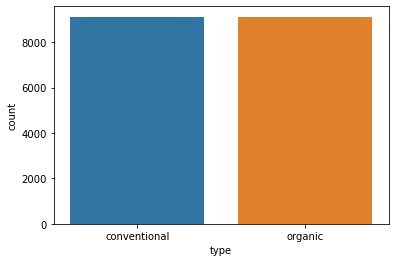

In [10]:
# Hence our data is prefectly balanced lets visualize 
sns.countplot(x='type',data=df)

In [11]:
## Data is balanced as we can see in above graph
# checking value count for region
df.value_counts(['region'])

region             
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago 

In [12]:
df.value_counts(['year'])

year
2017    5722
2016    5616
2015    5615
2018    1296
dtype: int64

#### From above observation "WestTexNewMexico" has little less value count  then other region andyear "2018" has very low value counts  as compare tho 2017 2016 and 2015

## Data Visualization

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

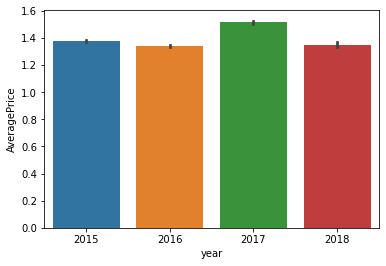

In [13]:
sns.barplot(x='year' , y='AveragePrice', data=df)

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

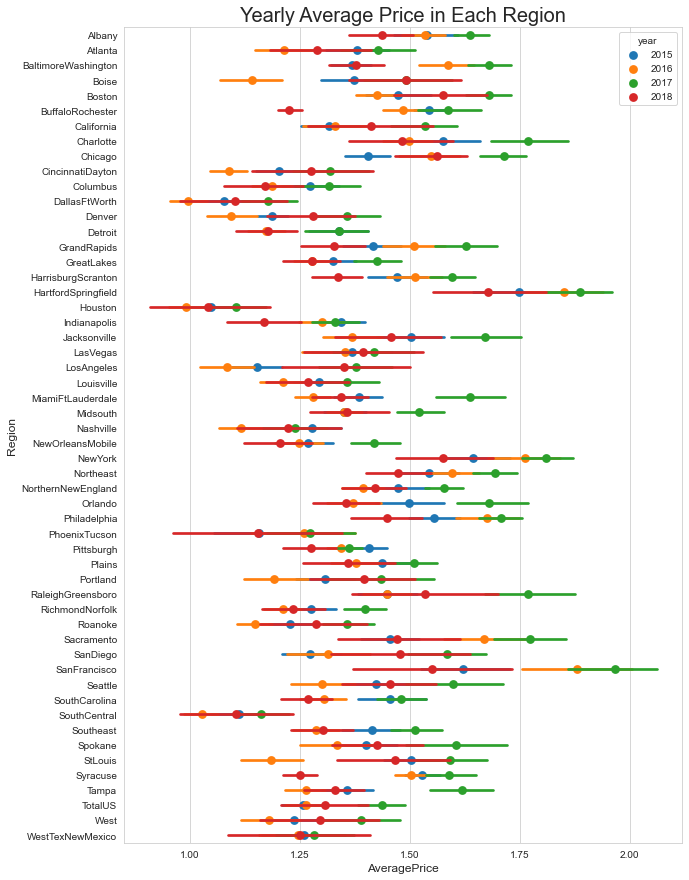

In [14]:
plt.figure(figsize=(10,15))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))           
plt.ylabel('Region',{'fontsize' : 'large'})         
plt.xlabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

#### From above graph its clear that  "2017" have higher average price then other years
#### And the other observation  is that "San Francisco" have higher average  price as compare to other states

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

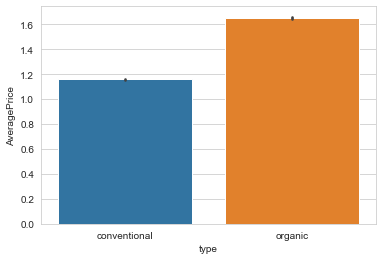

In [15]:
#Comparing Every feature with label

sns.barplot(x='type' , y='AveragePrice' , data=df)

#### From above graph its clear that "organic type" avocado have higher average price as compare to "conventional type" avocado

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

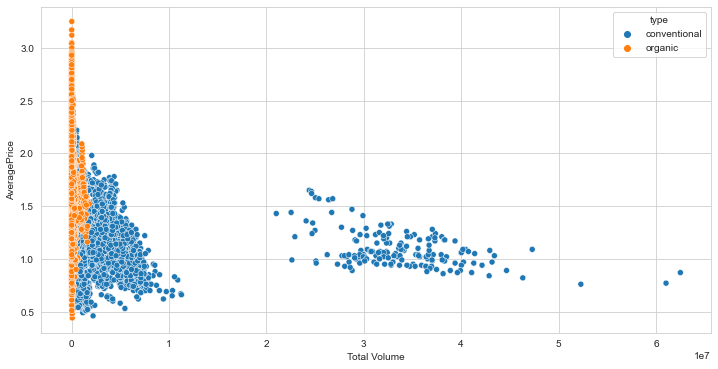

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Total Volume' , y='AveragePrice' , hue='type'  , data=df)

#### "conventional avocado type" have higher volume as compare to  "organic avocado type"

In [17]:
#Converting Date from object type to date type 

df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

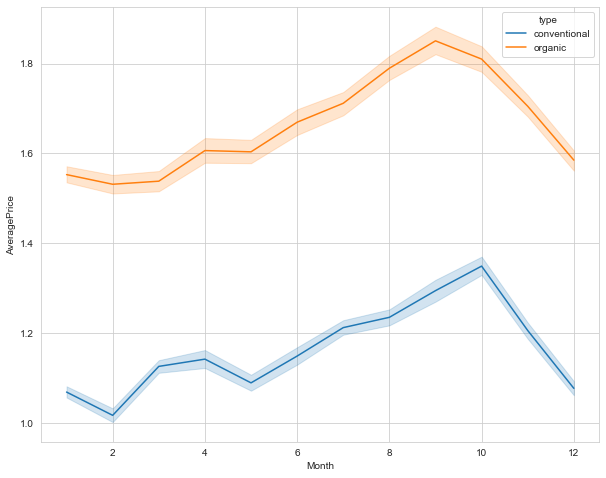

In [18]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Month' , y='AveragePrice' , hue='type' , data=df)
plt.show()

#### From  Month (June) to (October) there is sudden increase in Average Price in both types of Avocadoes

In [19]:
# Now droping date column as its of no use now
df=df.drop('Date',axis=1)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [20]:
#Encoding object data into integer

label_col = ['type','region']
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df[label_col]=df[label_col].apply(lambda x : label.fit_transform(x))

<AxesSubplot:>

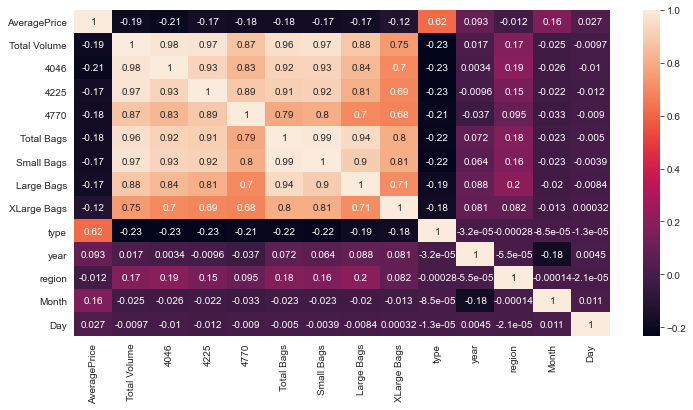

In [21]:
#Checking for correlation between Variables

plt.figure(figsize=(12,6))
sns.heatmap(df.corr() , annot=True)

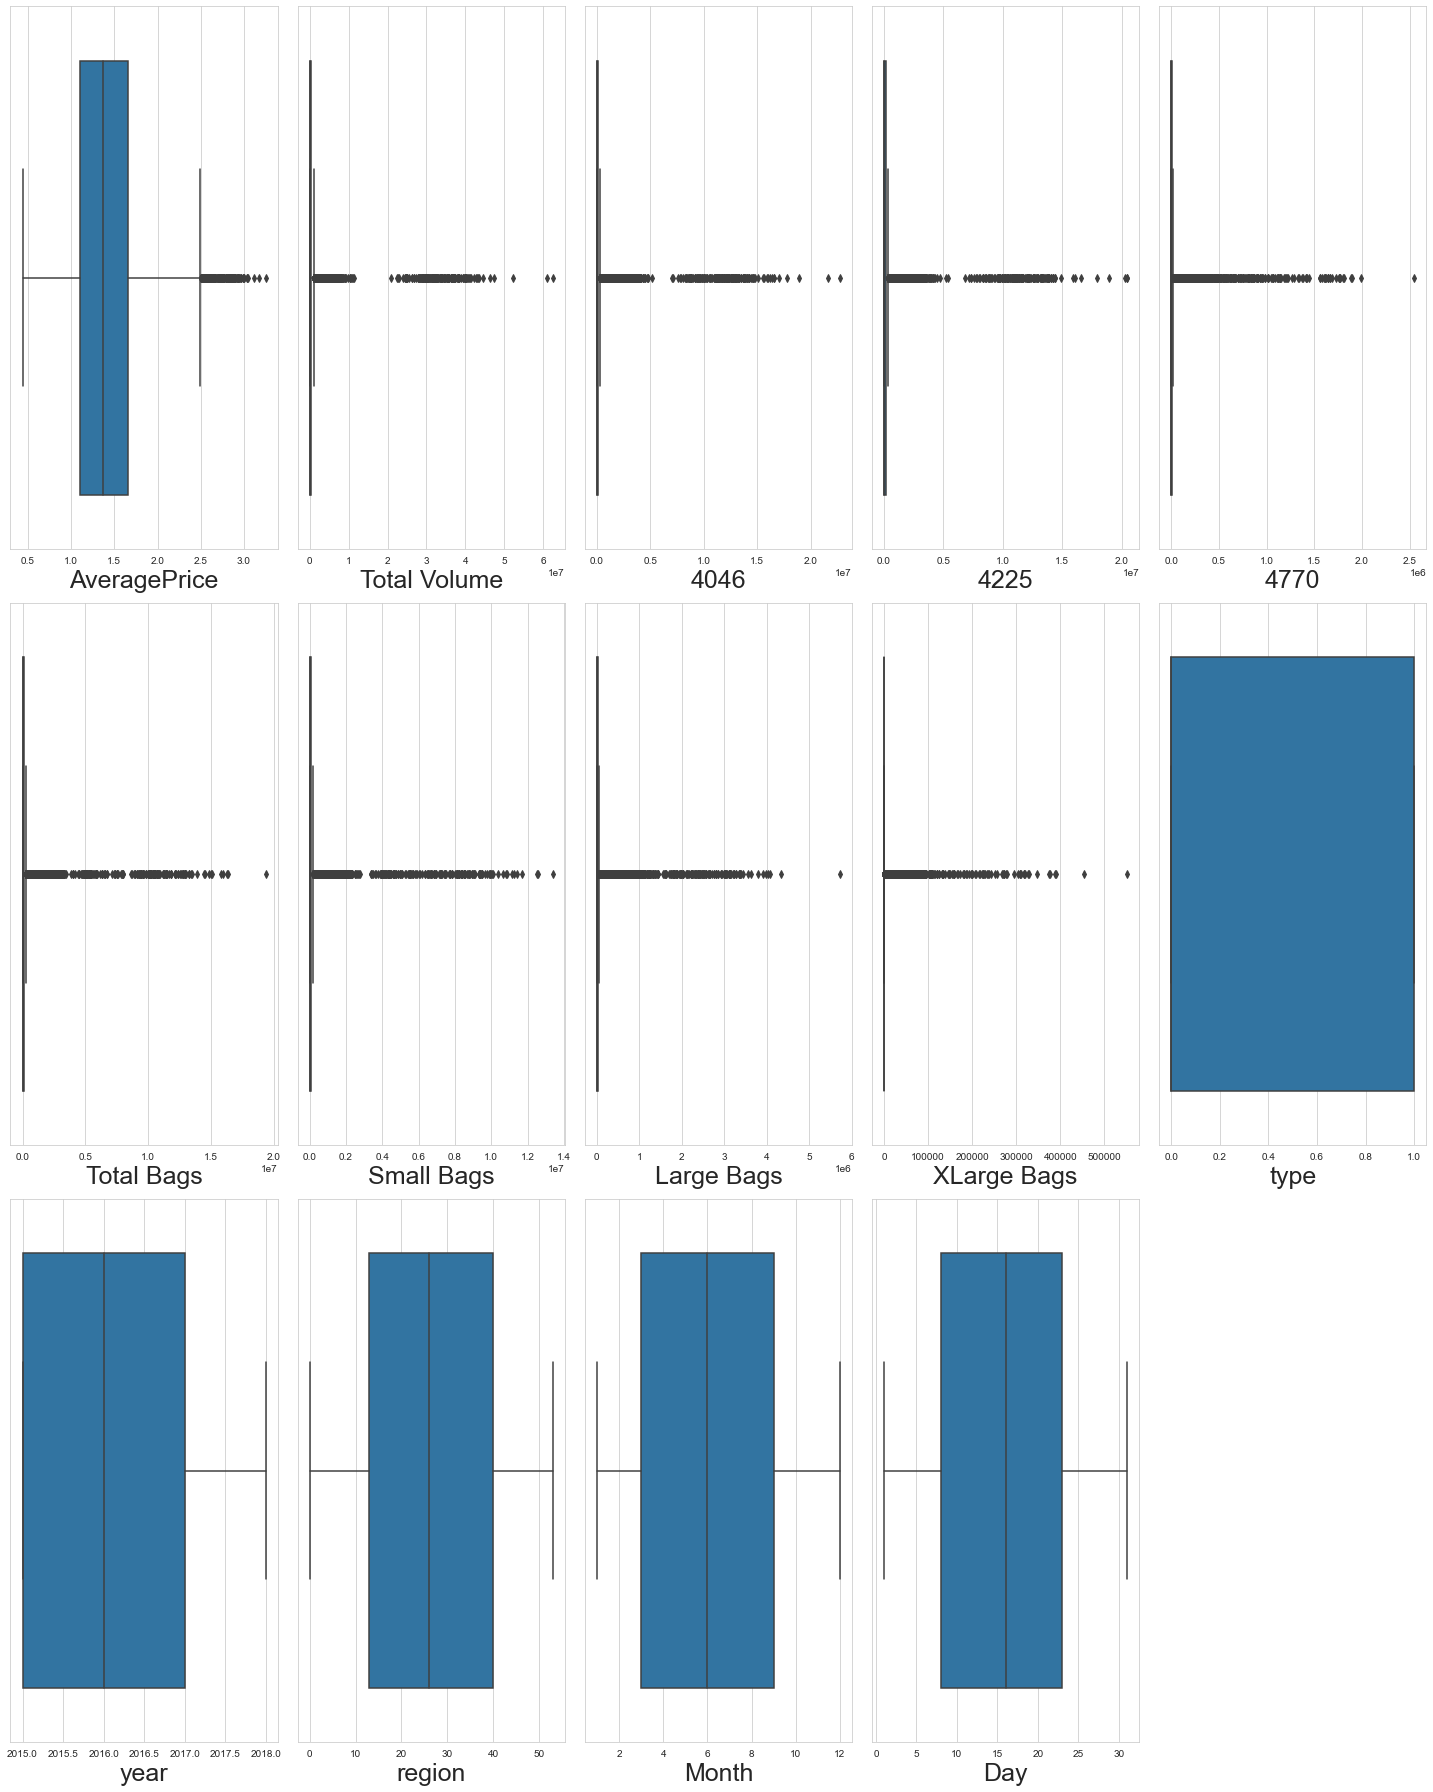

In [22]:
#Checking for outliers

plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

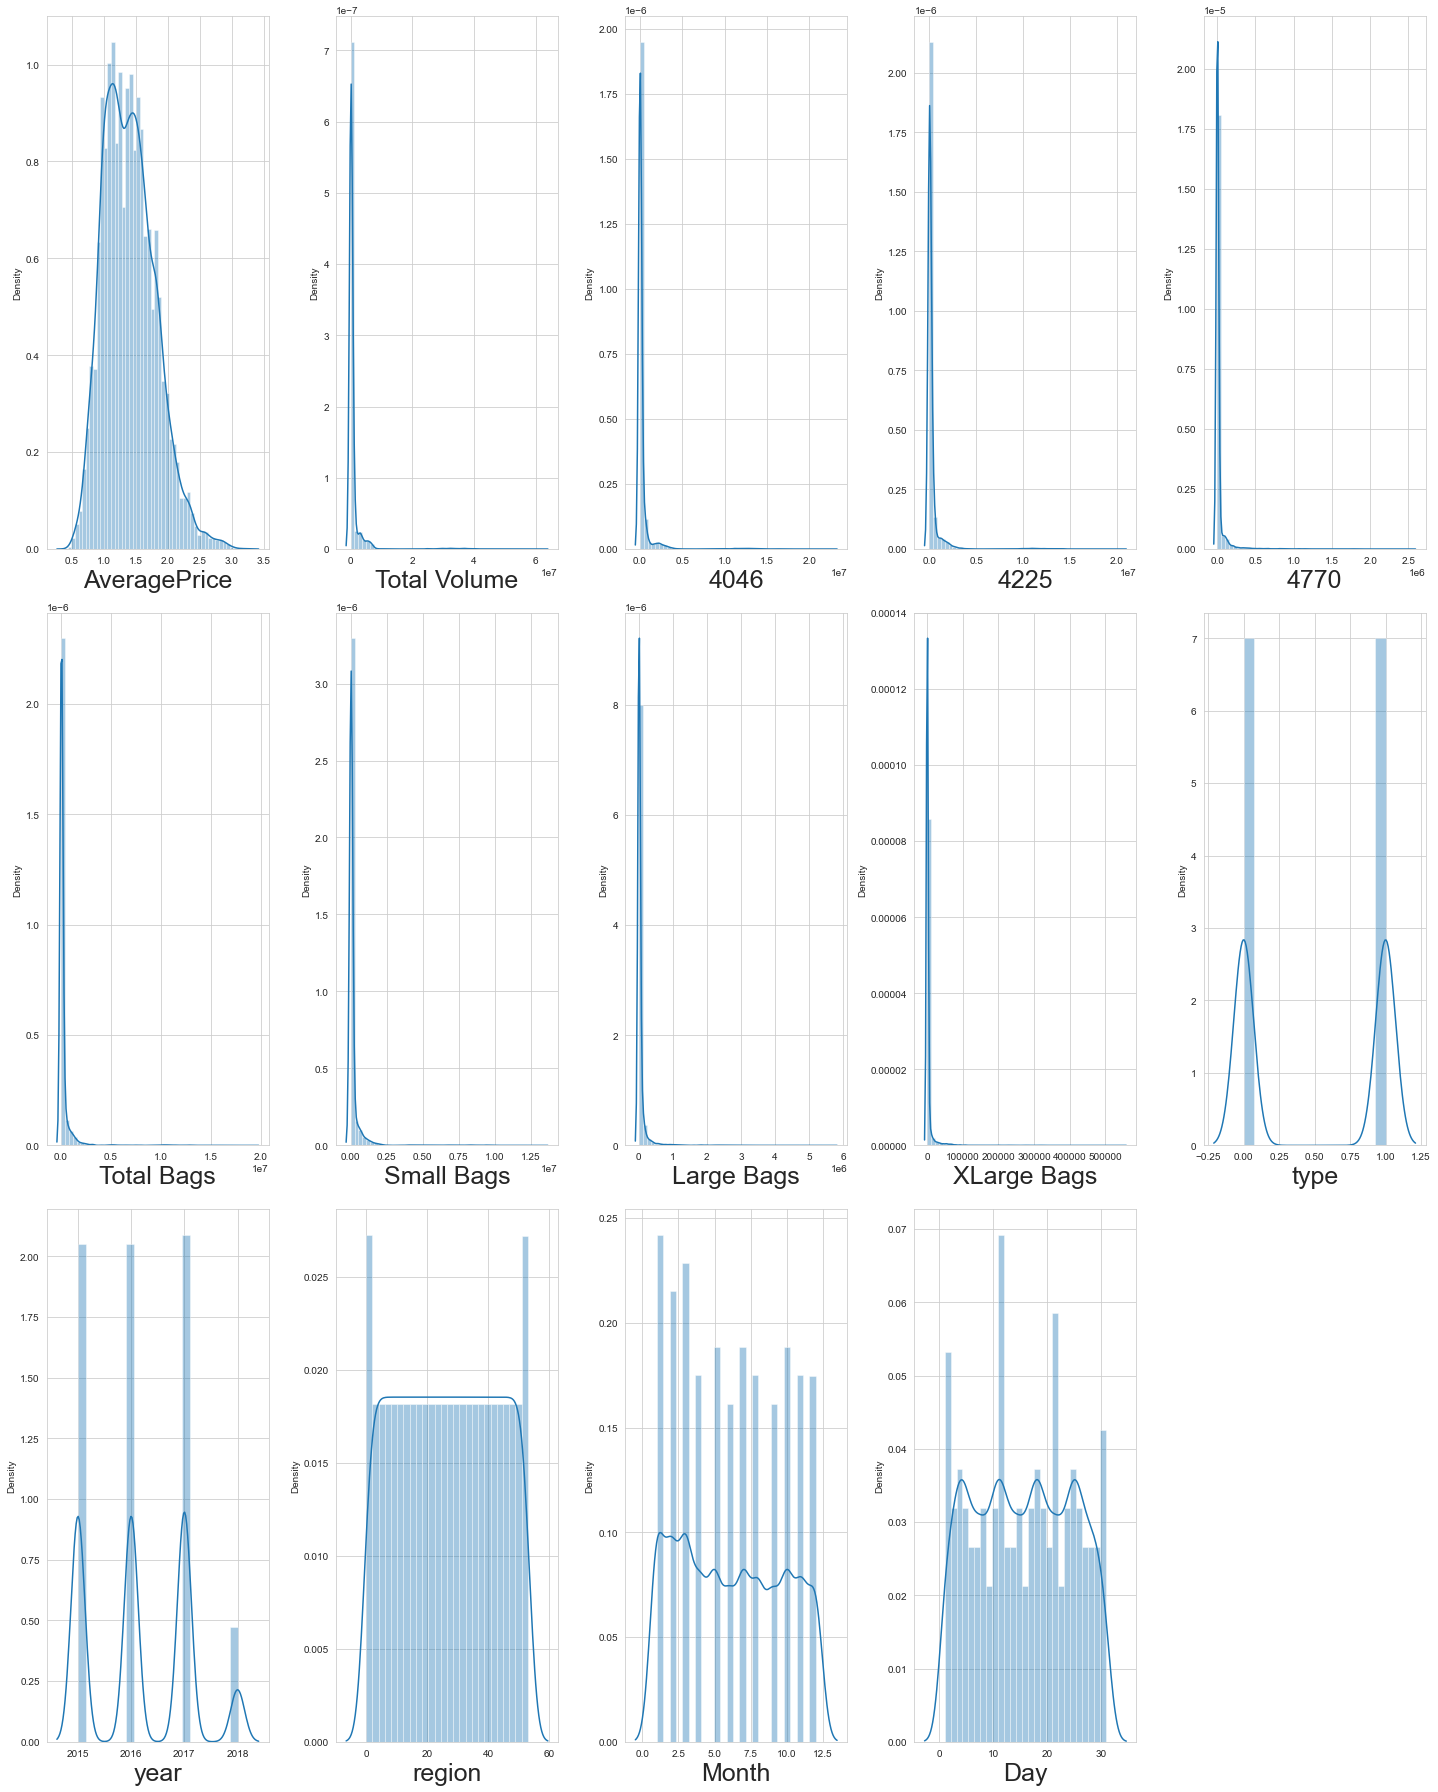

In [23]:
#Distribution Plot

plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

#### Data seems to be skeewed so ,we'll treat it accordingly


## Feature Engineering

In [24]:
#Removing outliers using Z score

from scipy import stats
z=np.abs(stats.zscore(df))
print(z)
print('row no. : ',np.where(z>3)[0])

[[0.18868864 0.22771641 0.23081597 ... 1.7002522  1.64763162 1.29185687]
 [0.13901962 0.23042664 0.23110251 ... 1.7002522  1.64763162 0.49423066]
 [1.18206895 0.21208462 0.23100731 ... 1.7002522  1.64763162 0.30339555]
 ...
 [1.15237477 0.24233073 0.2306933  ... 1.70081131 1.46495942 0.60817726]
 [1.30138182 0.24162464 0.2304279  ... 1.70081131 1.46495942 0.18944895]
 [0.53151208 0.24125273 0.22934712 ... 1.70081131 1.46495942 0.98707516]]
row no. :  [  346   359   780 ... 17304 17402 17428]


In [25]:
index = (np.where(z>3)[0])
df=df.drop(df.index[index])

In [26]:
df.shape

#Hence df is our new dataset without any outliers

(17651, 14)

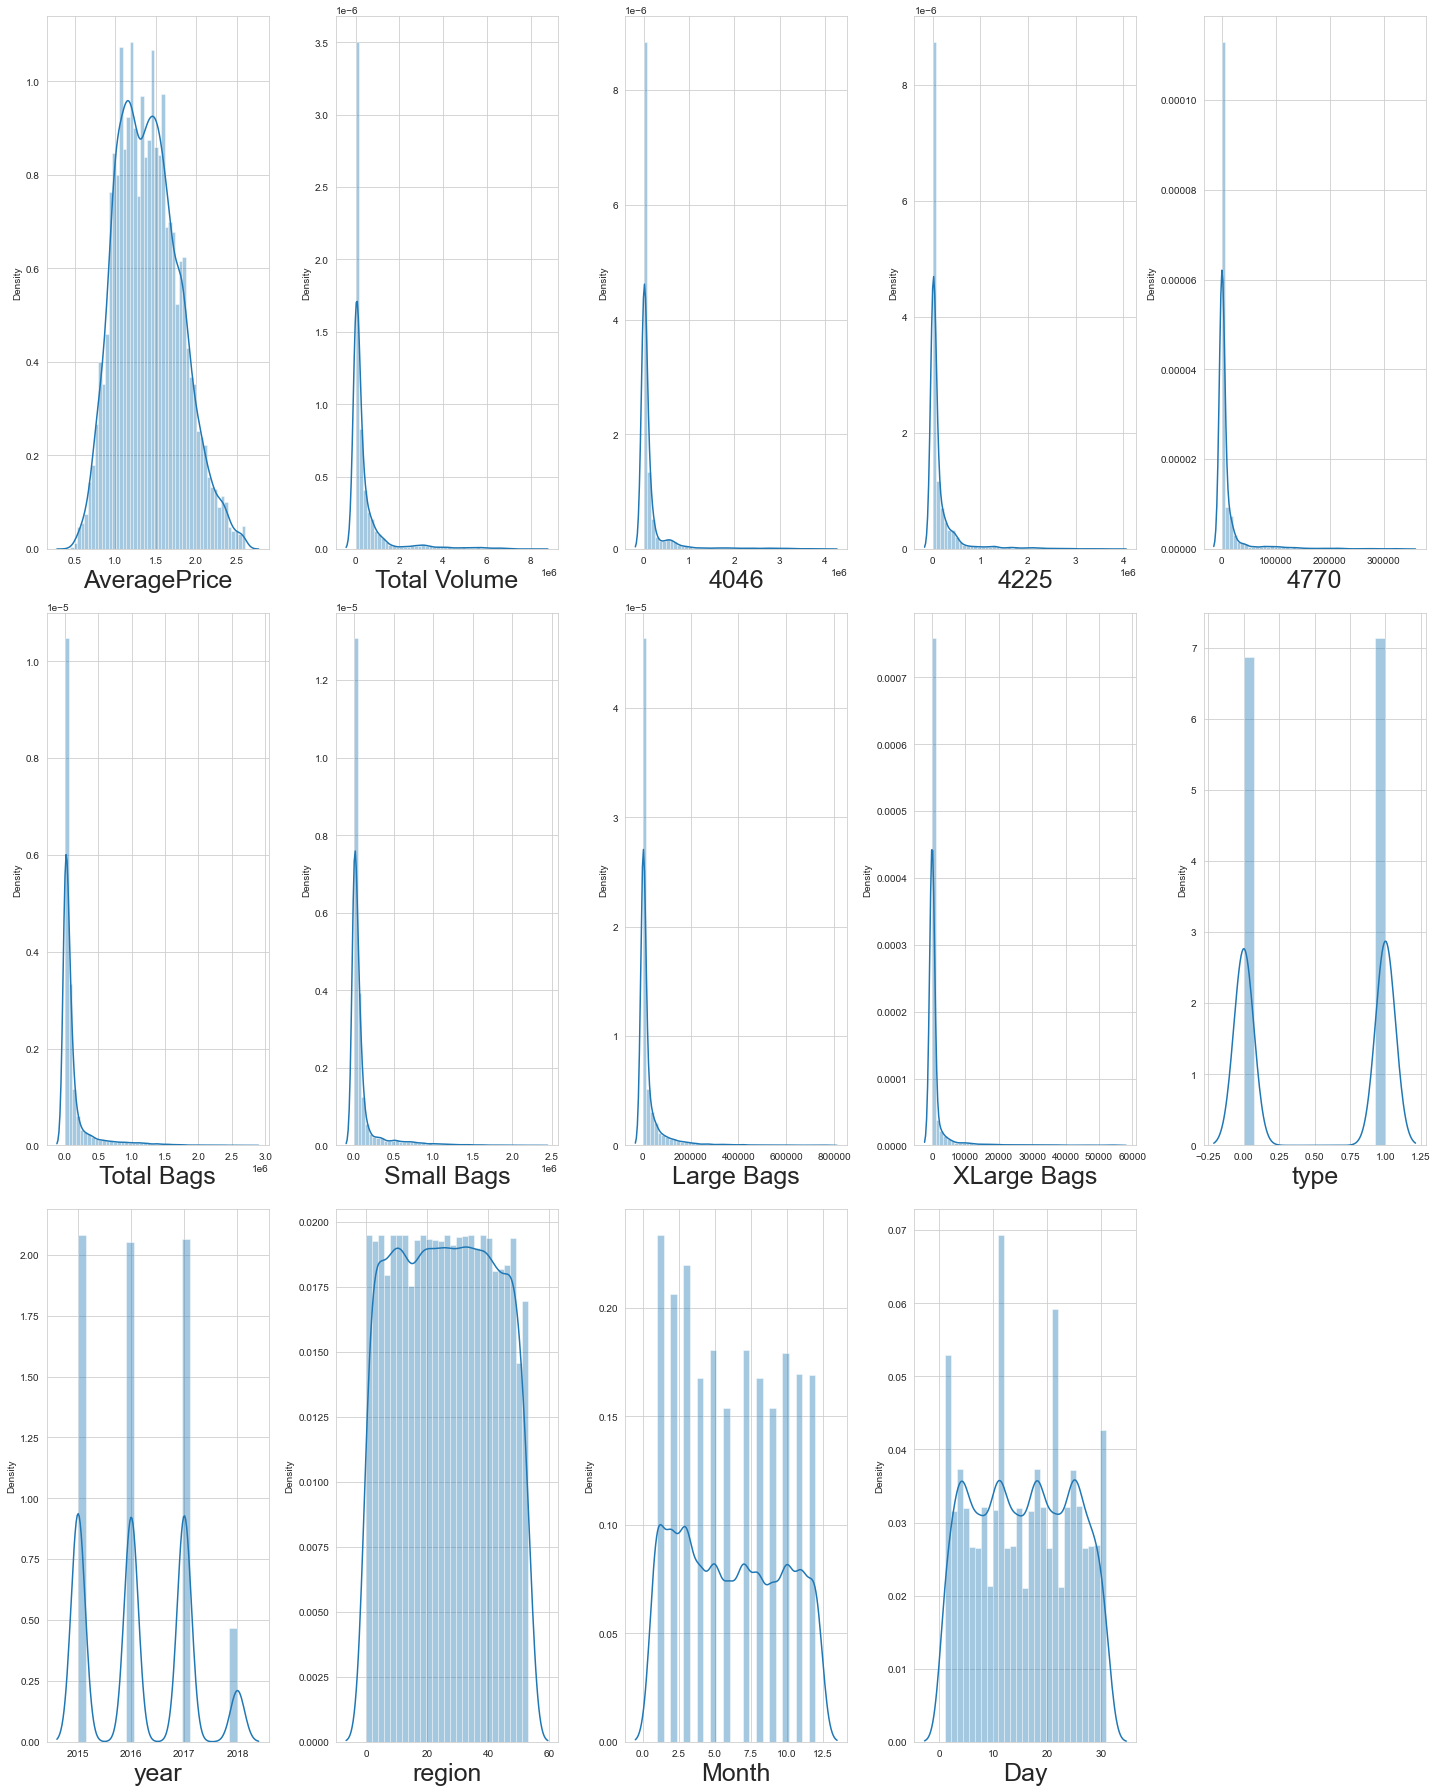

In [27]:
#Distribution Plot

plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

In [28]:
# now data seems to be good

#Now, let's proceed for model building and instantiation

#Splitting Features and Label

x = df.drop(columns=['AveragePrice','region'],axis=1) 

#Dropping column Region 

y = df['AveragePrice']

In [29]:
#Splitting data into training and testing

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=100)

# Model Building

In [30]:
#Importing Regression Models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [31]:
#Scaling Feature dataset
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [32]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,-0.392009,-0.349452,-0.278497,-0.322219,-0.429348,-0.400967,-0.379832,-0.259027,-1.019047,-1.210013,1.644612,1.289309
1,-0.401251,-0.350276,-0.303093,-0.321924,-0.426481,-0.397462,-0.379774,-0.259027,-1.019047,-1.210013,1.644612,0.491652
2,-0.338702,-0.350002,-0.141449,-0.319832,-0.431303,-0.403413,-0.379696,-0.259027,-1.019047,-1.210013,1.644612,-0.306004
3,-0.377438,-0.349235,-0.234593,-0.321511,-0.439577,-0.413717,-0.379277,-0.259027,-1.019047,-1.210013,1.644612,-1.103660
4,-0.405040,-0.349668,-0.305098,-0.321418,-0.438256,-0.412371,-0.378402,-0.259027,-1.019047,-1.210013,1.362113,1.517211


## 1.) LINEAR REGRESSION

In [33]:
lr = LinearRegression() 
lr.fit(x_train,y_train)                # training linear regression model
y_pred=lr.predict(x_test)

In [36]:
# Determining important metrics which will help us determine which model fits best to our problem statement
from sklearn import metrics
print('MAE : ' , metrics.mean_absolute_error(y_test,y_pred))
print('MSE : ' , metrics.mean_squared_error(y_test,y_pred))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :  0.22249472831160116
MSE :  0.08048698998106792
RMSE :  0.28370229111000833


In [41]:
#R2 score
lr.score(x_train,y_train)

0.44011384486979455

<AxesSubplot:xlabel='AveragePrice'>

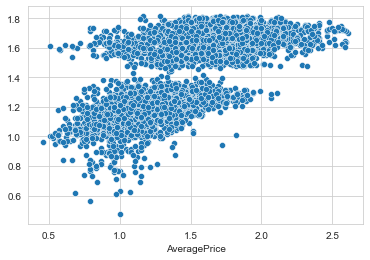

In [42]:
# ploting scaterplot b/w orignal and prediction to determine how accurate the prediction is
sns.scatterplot(y_test,y_pred)

As there is no straight line and R2 score is also very less so I am not sure that this is the best model

## 2.) Random Forest Regressor

In [43]:
# Checking with Random Forest Regressor
# intantiating and training the model
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

# Determining important metrics which will help us determine which model fits best to our problem statement
print('MAE : ' , metrics.mean_absolute_error(y_test,y_pred))
print('MSE : ' , metrics.mean_squared_error(y_test,y_pred))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :  0.09891457058690233
MSE :  0.019441583652843864
RMSE :  0.1394330794784504


<AxesSubplot:xlabel='AveragePrice'>

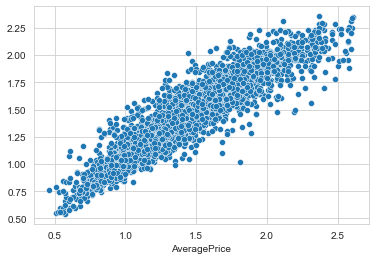

In [44]:
 #ploting scaterplot b/w orignal and prediction to determine how accurate the prediction is
sns.scatterplot(y_test,y_pred)

In [45]:
#Model confidence and R2/Adjusted R2 score

print(rfr.score(x_train,y_train))
print(rfr.score(x_test,y_test))

0.9806316357764605
0.8671854553928027


As we can see our Model Confidence is increased and RMSE is low as compared with linear regression model. Also there is a linear graph between Actual and Predicted data . 

## 3.) DECISION TREE REGRESSOR


In [46]:
dt = DecisionTreeRegressor() 
dt.fit(x_train,y_train)                # training linear regression model
y_pred=dt.predict(x_test)

# Determining important metrics which will help us determine which model fits best to our problem statement
print('MAE : ' , metrics.mean_absolute_error(y_test,y_pred))
print('MSE : ' , metrics.mean_squared_error(y_test,y_pred))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE :  0.13593927033763878
MSE :  0.04220258327668253
RMSE :  0.20543267334258816


In [47]:
#R2 score
print("train score:" ,dt.score(x_train,y_train))
print("test score:" ,dt.score(x_test,y_test))

train score: 1.0
test score: 0.7116944288476206


## 4.) SUPPORT VECTOR REGRESSOR

In [48]:
svr = SVR() 
svr.fit(x_train,y_train)                # training linear regression model
y_pred=svr.predict(x_test)

# Determining important metrics which will help us determine which model fits best to our problem statement
print('MAE : ' , metrics.mean_absolute_error(y_test,y_pred))
print('MSE : ' , metrics.mean_squared_error(y_test,y_pred))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :  0.22259614261516825
MSE :  0.08434760978318066
RMSE :  0.29042659964813944


In [49]:
#R2 score
print("train score:" ,svr.score(x_train,y_train))
print("test score:" ,svr.score(x_test,y_test))

train score: 0.4146175631451974
test score: 0.423782054893453


#### As we can see that  "r2" score of testing data is best for 'Random Forest' as compare to other models and RMSE score  also seems to be lowest in 'Random Forest' . And most of all the graph between actual and predicted value looks  linear and fits quiet good with that model.

#### Hence, we are selecting Random forest regressoras  as our best model

In [50]:
#Cross Validation Check

from sklearn.model_selection import cross_val_score

cvlr=cross_val_score(lr,x,y,cv=5)
cvrfr=cross_val_score(rfr,x,y,cv=5)
cvdt=cross_val_score(dt,x,y,cv=5)
cvsvr=cross_val_score(svr,x,y,cv=5)

print ('CV SCORE LR : ' , cvlr.mean())
print ('CV SCORE RFR : ' , cvrfr.mean())
print ('CV SCORE DTR : ' , cvdt.mean())
print ('CV SCORE SVR : ' , cvsvr.mean())

CV SCORE LR :  -30.049217078183794
CV SCORE RFR :  0.21250213441151397
CV SCORE DTR :  -0.2896430124344167
CV SCORE SVR :  0.1280474394310023


#### The high cross validation score of Random Forest confirms it to be best model

## HYPER PARAMETER TUNING USING GRID SEARCH OF RFR:


In [51]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint
print ('Current Parameters:\n')
pprint(rfr.get_params())

Current Parameters:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [52]:
param_grid = {
    'bootstrap': [True,False],
    'max_depth': (2,3),
    'max_leaf_nodes': (2,3),
    'max_samples':(1,2),
    'min_samples_leaf': (1,2),
    'min_samples_split': (2,3),
    'n_estimators': range(100,200,50),
}

In [ ]:
grid = GridSearchCV(rfr
                    ,param_grid=param_grid,cv=5)
grid.fit(x_train,y_train)

In [ ]:
best_param = grid.best_params_
best_param

In [ ]:
#Applying Best Parameters in our model and check 

rfr_t = RandomForestRegressor(bootstrap=False , max_depth =2 , max_samples=1,min_samples_leaf=1,
                              min_samples_split=2 ,max_leaf_nodes=3, n_estimators=150)
rfr_t.fit(x_train,y_train)

In [ ]:
ypred=rfr_t.predict(x_test)

In [ ]:
#Model confidence and R2/Adjusted R2 score

print(rfr_t.score(x_train,y_train))
print(rfr.score(x_test,y_test))

Hence, after Hyperparameter tuning we achieve higher accuracy for test data and increased model efficiency.

## Now for the 2nd part of our problem statement we need to make a model which determines the region.

In [ ]:
# sepreting our feature and label
x = df.drop("region", axis=1)
y = df["region"]

In [ ]:
#Scaling Feature dataset
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [ ]:
# spliting or feature and label into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier , GradientBoostingClassifier

In [ ]:
models = {"LogisticRegression" : LogisticRegression(),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "Decision Tree"      : DecisionTreeClassifier(),
          "Random Forest"      : RandomForestClassifier()}

In [ ]:
for name, model in models.items():
    model.fit(x_train,y_train)
    print(name + " is trained now.")

In [ ]:
for name, model in models.items():
    print(name + ": {:,.2f}%".format(model.score(x_test,y_test)*100))

## Hyper Parameter tuning:

### GridSearch CV:

In [ ]:
parameters = {'criterion':{"gini", "entropy"},
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':int,
             'max_depth':int}

#### Random Forest Classifier:

Here we use "Random Forest Classifier" because this model has highest accuracy score when compared to the other models.

In [ ]:
RandomForest = RandomForestClassifier(criterion = 'gini', max_features = 'log2')
RandomForest.fit(x_train,y_train)
RandomForest.score(x_train,y_train)

pred_decision = RandomForest.predict(x_test)
RandomForestS = r2_score(y_test,pred_decision)
print('R2 Score:', RandomForestS*100)

RandomForestScore = cross_val_score(RandomForest,x,y,cv = 5)
RandomForestC = RandomForestScore.mean()
print("Cross Val Score:",RandomForestC*100)

## Saving model

In [ ]:
import pickle
filename='Avocado.pkl'
pickle.dump(RandomForest,open(filename,'wb'))

## Conclusion